<a href="https://colab.research.google.com/github/Gweneal3/Instagram_Clone_Bootcamp/blob/main/Loan%20Status%20Prediction/Loan_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Source: https://www.kaggle.com/datasets/ninzaami/loan-predication

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Processing

In [ ]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv("./train.csv")

In [ ]:
print(loan_dataset.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [ ]:
print(loan_dataset.shape)

(614, 13)


In [ ]:
# Statistical Measure
print(loan_dataset.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [ ]:
# check about the missing value
print(loan_dataset.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


Deal with the missing value

In [ ]:
# If numerical -> can find mean, but this dataset has many categorical data, cannot do imputation method
# DROP missing value
loan_dataset = loan_dataset.dropna()

In [ ]:
print(loan_dataset.shape)
print(loan_dataset.isnull().sum())

(480, 13)
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


Label encoding<br>
Current label - Y(YES), N(NO)<br>
Change to - 1(YES), 0(NO)

In [ ]:
loan_dataset = loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}})

In [ ]:
loan_dataset = loan_dataset.replace({"Married":{'No':0,'Yes':1}, 
                                     "Gender":{'Male':1,'Female':0},
                                     "Self_Employed":{'No':0,'Yes':1},
                                     "Property_Area":{'Rural':0,'Semiurban':1,'Urban':2},
                                     "Education":{'Graduate':1,'Not Graduate':0}})

In [ ]:
print(loan_dataset)

      Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
1    LP001003       1        1          1          1              0   
2    LP001005       1        1          0          1              1   
3    LP001006       1        1          0          0              0   
4    LP001008       1        0          0          1              0   
5    LP001011       1        1          2          1              1   
..        ...     ...      ...        ...        ...            ...   
609  LP002978       0        0          0          1              0   
610  LP002979       1        1         3+          1              0   
611  LP002983       1        1          1          1              0   
612  LP002984       1        1          2          1              0   
613  LP002990       0        0          0          1              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1               4583             1508.0       128.0             360.0   
2

In [ ]:
# Dependent column values
print(loan_dataset['Dependents'].value_counts())

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64


In [ ]:
# 3+ not good data type, so change to 4
loan_dataset = loan_dataset.replace(to_replace = '3+',value=4)

Data Visualisation

<AxesSubplot:xlabel='Education', ylabel='count'>

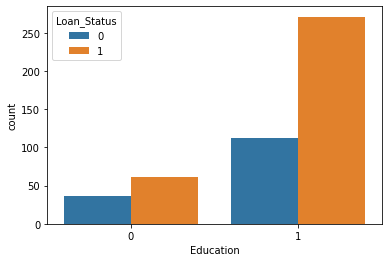

In [ ]:
# education vs loan status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<AxesSubplot:xlabel='Married', ylabel='count'>

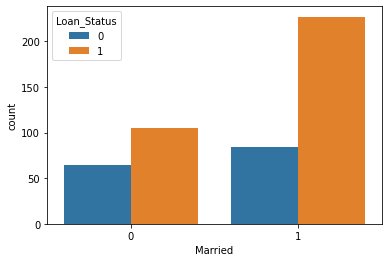

In [ ]:
# married vs loan status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [ ]:
# Separate data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'], axis=1)
Y = loan_dataset['Loan_Status']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=0)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


Training Model

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

In [ ]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print(training_data_accuracy)

0.7893518518518519


In [ ]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print(test_data_accuracy)

0.8125


Make a predictive system

In [ ]:
input_data = X_test.iloc[:1]
prediction = classifier.predict(input_data)
if(prediction[0] == 0):
  print("Loan Status: Failed")
else:
  print("Loan Status: Success")

Loan Status: Success
